In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

## Load data

In [11]:
energies_hee = np.load('../local_data/energies_cnot_1.npy')
convergences_hee = np.load('../local_data/convergences_cnot_1.npy')
grads_hee = np.load('../local_data/grad_norms_cnot_1.npy')
grad_variances_hee = np.load('../local_data/grad_variances_cnot_1.npy')

In [12]:
energies_ng = np.load('../local_data/energies_cnot_2.npy')
convergences_ng = np.load('../local_data/convergences_cnot_2.npy')
grads_ng = np.load('../local_data/grad_norms_cnot_2.npy')
grad_variances_ng = np.load('../local_data/grad_variances_cnot_2.npy')

## Plots


In [27]:
dataset = qml.data.load('qchem', molname="He2")[0]
exact_energy = dataset.fci_energy
layers = np.arange(2, 17, 2)

In [14]:
min_hee = np.min(energies_hee, axis=1)[:,-1]
min_ng = np.min(energies_ng, axis=1)[:,-1]

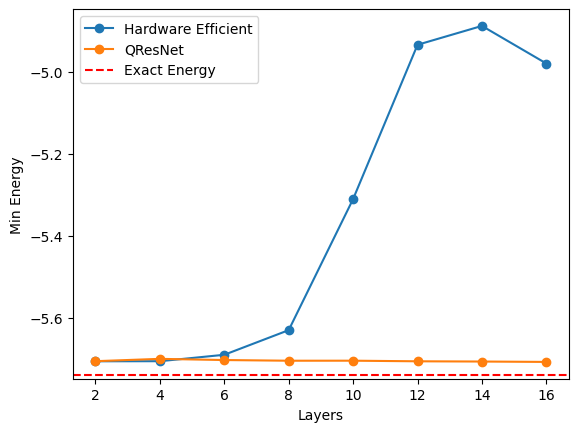

In [36]:
plt.plot(layers, min_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, min_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()

In [24]:
median_hee = np.median(energies_hee, axis=1)[:,-1]
median_ng = np.median(energies_ng, axis=1)[:,-1]

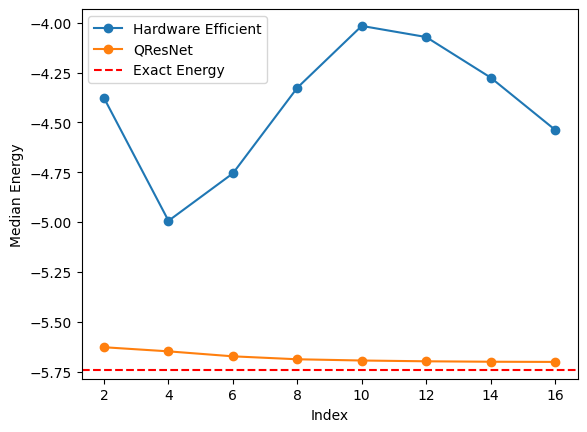

In [34]:
plt.plot(layers, median_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, median_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Index')
plt.ylabel('Median Energy')
plt.legend()
plt.show()